# **Mission of clustering notebook**

You are a member of a bioinformatics team investigating the [effect of spaceflight on astronaut health](https://en.wikipedia.org/wiki/Effect_of_spaceflight_on_the_human_body).  Your team is trying to find the [biological pathways](https://en.wikipedia.org/wiki/Biological_pathway) that respond to exposure of adverse conditions in space such as [microgravity](https://www.nasa.gov/centers-and-facilities/glenn/what-is-microgravity/) and [radiation](https://www.nasa.gov/directorates/esdmd/hhp/space-radiation/).  Ultimately your team will need phenotype data as labels to train your supervised learning models, but for now, all you have is the gene expression data in the form of [RNA-seq](https://en.wikipedia.org/wiki/RNA-Seq).  

Your mission is to use unsupervised machine learning - [clustering](https://en.wikipedia.org/wiki/Cluster_analysis) - to determine if the astronaut samples and their ground control counterparts have clearly distinguishable gene expression profiles.  For if they do, then there is a chance that a supervised learning method can predict responses to spaceflight using different combinations and weights of gene expression from the RNA-seq data.

In this notebook, you will use k-means, PCA, and a heatmap to reach your conclusions.

# Read in the methods

**IMPORTANT**: Make sure you put a copy of the `methods.ipynb` in your google drive by following [these instructions](https://docs.google.com/document/d/1V9a3Z5YKT2Pbef4fgPAwB83bHX-p-rPBRRwo7w5Bi9k/edit?usp=sharing).

We need to read those methods into this notebook so that we can use them here.  You will get prompted to select the gmail address to use to permit access to your google drive for this notebook.

Note that we will import the methods in the notebook as "m", so all subsequent references to methods in that notebook will be prefixed with "m.".

In [ ]:
# install and import the python module for importing a notebook
!pip install import_ipynb
import import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.0 MB/s eta 0:00:00


In [ ]:
# mount your google drive to this notebook
from google.colab import drive
drive.flush_and_unmount()
drive.mount("mnt", force_remount=True)

Drive not mounted, so nothing to flush and unmount.
Mounted at mnt


In [ ]:
# import the "Copy of methods.ipynb" from your google drive into this notebook (this will take a while -- mabye 5 minutes?)
m = __import__("mnt/MyDrive/Colab Notebooks/Copy of methods")

importing Jupyter notebook from mnt/MyDrive/Colab Notebooks/Copy of methods.ipynb
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 143.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 123.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 134.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 131.4 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8026 sha256=13b826f465a0867a93d0b9eee3d23d17831cd7618b71bd5f5579e8a964b1ca87
  Stored in directory: /tmp/pip-ephem-wheel-cache-8xb03d4_/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built session-info
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 552.9/552.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.4 MB/

# read in data and metadata

The data that we will be using is [normalized](https://en.wikipedia.org/wiki/Normalization_(statistics)) RNA-seq data which was generated from retinal tissue.  The counts of genes per sample are represented in a table and have been normalized, which means they've been changed to account for differences in how the RNA-seq experiment played out.  For example, some transcripts may have been copied multiple times in the experiment (called [sequencing depth](https://www.biostars.org/p/282708/)) while others may not have been as deeply copied.  Moreover, because some genes are much longer than others, longer genes will have more transcript fragments and appear to be more highly expressed than shorter genes.  These differences will change the results of our analysis because we are looking for differences in gene expression (i.e. counts) between genes and between samples.
 Normalization is a statistical process of correcting for these differences, and there are many methods available.  The goal of normalization is to make the gene expression profiles more comparable across samples, allowing for accurate comparisons and statistical analysis.

In [ ]:
# read in the RNA-seq data from OSD-255
data=dict()
metadata=dict()
data['255-normalized'] = m.read_rnaseq_data('255_rna_seq_Normalized_Counts')
metadata['255'] = m.read_meta_data('255')

In [ ]:
# display the dimensions of the RNA-seq data set and the associated metadata
print('data shape: ', data['255-normalized'].shape)
print('metadata shape: ', metadata['255'].shape)

data shape:  (23419, 17)
metadata shape:  (16, 72)


# Use the K-means algorithm to cluster the RNA-seq data

## cluster using original unfiltered data

In [ ]:
# make a copy of the original rna-seq dataframe
df = data['255-normalized']

In [ ]:
# run the my_kmeans method with k=2
m.my_kmeans(df, metadata['255'], k=2)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [1] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [0] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [1] Space Flight


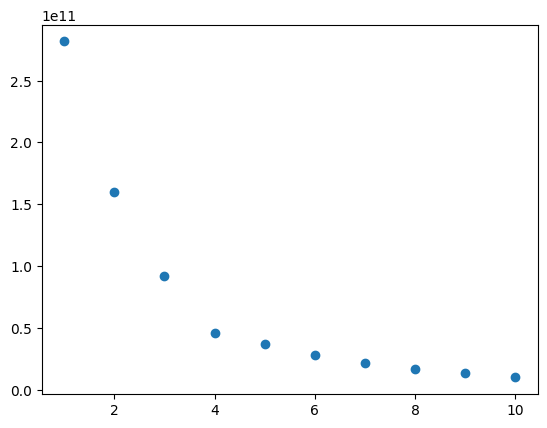

In [ ]:
# find ideal value of k in k-means for this data
m.find_k_elbow(df)

In [ ]:
# run the my_kmeans method with k=3
m.my_kmeans(df, metadata['255'], k=3)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [1] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [2] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [1] Space Flight


## cluster using custom-filtered data

before filter:  (23419, 17)
after filter:  (19583, 17)


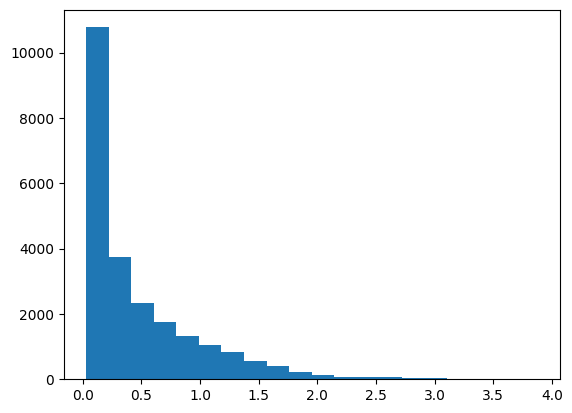

In [ ]:
# filter out nans and remove genes with CV < 0.1
print('before filter: ', df.shape)
df = m.filter_data(df, dropnans=True, dropgenes=None, droplowcvs=0.1)
print('after filter: ', df.shape)

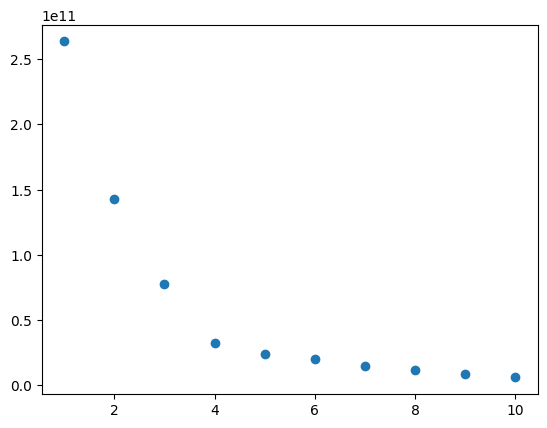

In [ ]:
# find ideal value of k in k-means for this data
m.find_k_elbow(df)

In [ ]:
# run the my_kmeans method with k=4
m.my_kmeans(df, metadata['255'], k=4)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [3] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [3] Space Flight
sample:  GSM3932702 , cluster:  [3] Space Flight
sample:  GSM3932703 , cluster:  [3] Space Flight
sample:  GSM3932704 , cluster:  [3] Space Flight
sample:  GSM3932705 , cluster:  [2] Space Flight
sample:  GSM3932706 , cluster:  [0] Space Flight
sample:  GSM3932707 , cluster:  [3] Space Flight
sample:  GSM3932708 , cluster:  [1] Space Flight


## cluster using DGEA-filtered data

In [ ]:
# filter genes to those significantly differentially expressed between ground control and space flight
df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 35.43 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 39.40 seconds.

Fitting LFCs...
... done in 20.12 seconds.

Calculating cook's distance...
... done in 0.05 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.36 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 0.29 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

... done in 5.42 seconds.



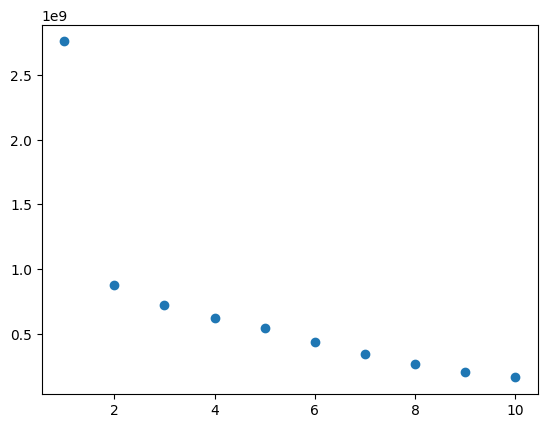

In [ ]:
# find ideal value of k in k-means for this data
m.find_k_elbow(df)

In [ ]:
# run the my_kmeans method with k=2
m.my_kmeans(df, metadata['255'], k=2)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [0] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [1] Space Flight
sample:  GSM3932706 , cluster:  [1] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [1] Space Flight


It looks like the gene expression of all the ground control samples clusters uniquely into group 1.   If we insist on 3 clusters, then sample GSM3932708 gets put into its own cluster, suggesting that may be an outlier in the spaceflight group. What we need is a visual way to view how the samples cluster and separate between ground control and spaceflight.  For that we turn to PCA clustering.

##**QUESTIONS**

1. Using the histogram of CVs, about how many genes have a CV of 0.1 or less?  

2. Based on these results, what is the ideal value of k for k-means for this data?

3. Given these results, would you say that spaceflight and ground control samples have distinct gene expression profiles?

**Double click here to enter your answers to the questions above.**

1. 3836 genes.

2. Ideal value of k is 2.

3. Yes

# Use PCA to cluster and plot the RNA-seq data

Let's use the PCA clustering technique so we can visualize the data in 2-dimensions to see how spaceflight and ground control samples cluster and separate.

In [ ]:
# filter genes to those significantly differentially expressed between ground control and space flight
df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 33.15 seconds.

Fitting dispersion trend curve...
... done in 0.81 seconds.

Fitting MAP dispersions...
... done in 36.75 seconds.

Fitting LFCs...
... done in 19.10 seconds.

Calculating cook's distance...
... done in 0.04 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.59 seconds.

Fitting MAP dispersions...
... done in 0.59 seconds.

Fitting LFCs...
... done in 0.47 seconds.

Running Wald tests...


Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

... done in 6.38 seconds.



In [ ]:
# transpose the dataframe in preparation for PCA
print('shape before transpose: ', df.shape)
X = df.drop(columns=['Unnamed: 0']).to_numpy().T
print('shape after transpose: ', X.shape)


shape before transpose:  (353, 17)
shape after transpose:  (16, 353)


explained variance ratio (first two components): [0.72997254 0.08189642]


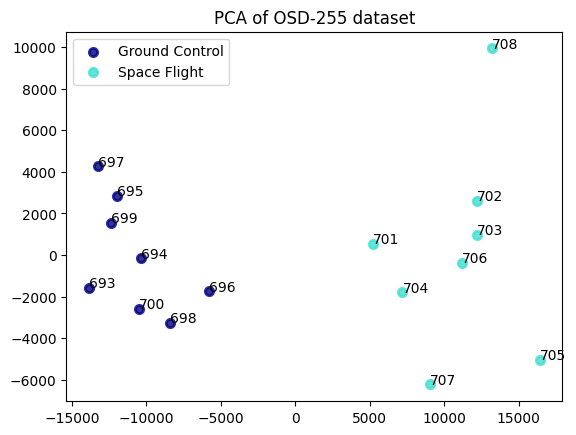

In [ ]:
# create an array y that represents whether the sample is ground control or spaceflight
y = m.np.array(list(metadata['255']['Factor Value[Spaceflight]']))
target_names=m.np.array(['Ground Control', 'Space Flight'])

# run PCA to reduce dimensions from 23,419 to 2!
pca = m.PCA(n_components=2)
X_r = pca.fit_transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

# plot the pca plot
m.plt.figure()
colors = ["navy", "turquoise"]
lw = 2
for color, i, target_name in zip(colors, ['Ground Control', 'Space Flight'], target_names):
    m.plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name)
m.plt.legend(loc="best", shadow=False, scatterpoints=1)
m.plt.title("PCA of OSD-255 dataset")

# show the last 3 digits of the sample name
samples = list(df.columns)[1:]
for i, txt in enumerate(samples):
    m.plt.annotate(txt[-3:], (X_r[i][0], X_r[i][1]))
m.plt.show()


 We're not using the PCA plot for modeling the data and making predictions so there's no real concept of accuracy or performance.  Instead, we're using it to get a visual representation of the distribution of the data.  Now  we see how the ground control and space flight samples cluster together except for a few outliers.

**QUESTIONS**

1. Which samples are the outlier space flight samples?

2. Which samples are the outlier ground control samples?

3. Do these PCA clusters corroborate what we found using K-means in terms of data separation and outliers?

**Double click here to enter your answers to the questions above.**

1. GSM3932708.

2. No such outliers exist.

3. Yes becasue PCA cluster was able to visually represent data separation between ground control and space flight samples. Additionally, it was able demonstrate the space flight sample outlier as well.

# Use the DESeq2 implementation of PCA

[DESeq2](https://www.bioconductor.org/packages/release/bioc/vignettes/DESeq2/inst/doc/DESeq2.html) is a software implementation that performs [differential gene expression analysis](https://en.wikipedia.org/wiki/Gene_expression_profiling) to identify which genes are differentially expressed (highly up-regulated or down-regulated) relative to other genes in the expression profile.  This tool is used to identify which genes may be responsible for a particular phenotype.  

In addition to performing differential gene expression analysis, DESeq2 also has an implementation of PCA.  This section of the notebook explores using it to compare against the `pydeseq2` implementation results.

In [ ]:
# filter genes to those significantly differentially expressed between ground control and space flight
df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

Fitting size factors...
... done in 0.03 seconds.

Fitting dispersions...
... done in 33.78 seconds.

Fitting dispersion trend curve...
... done in 0.79 seconds.

Fitting MAP dispersions...
... done in 36.63 seconds.

Fitting LFCs...
... done in 18.98 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.39 seconds.

Fitting MAP dispersions...
... done in 0.37 seconds.

Fitting LFCs...
... done in 0.27 seconds.

Running Wald tests...
... done in 8.31 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

In [ ]:

# run DESeq2
dds = m.run_deseq2(df, metadata['255'])

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.43 seconds.

Fitting dispersion trend curve...
... done in 0.03 seconds.

Fitting MAP dispersions...
... done in 0.56 seconds.

Fitting LFCs...
... done in 0.23 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 1 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



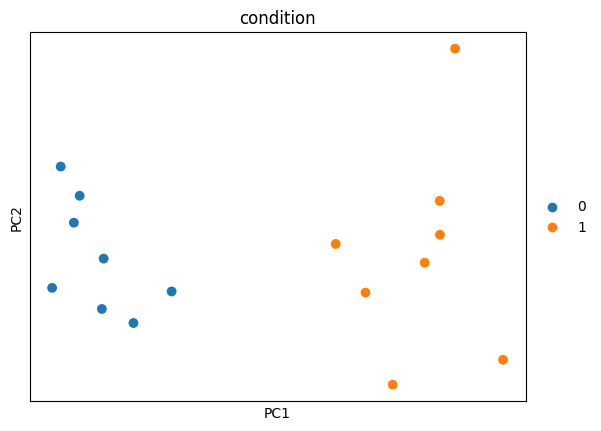

In [ ]:
m.sc.tl.pca(dds)
m.sc.pl.pca(dds, color='condition', size=200)

**QUESTIONS**

1. What is the shape of the dataframe used as input to count the gene expression?  

2. How and why is this different than the shape of the original RNA-seq dataframe?

3. Do the 2 PCA plots agree in their distribution in 2 dimensions?

**Double click here to enter your answers to the questions above.**

1. 23419 rows and 6 columns.

2. Some of the column values have been normalized before using the data as input to PCA implemenation.

3. Yes they are as the data points in both the PCA plots are located in the same positions.

# Use Gaussian mixture model to cluster the RNA-seq data


In [ ]:
# filter genes to those significantly differentially expressed between ground control and space flight
df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 35.20 seconds.

Fitting dispersion trend curve...
... done in 1.33 seconds.

Fitting MAP dispersions...
... done in 37.21 seconds.

Fitting LFCs...
... done in 19.14 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.34 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...
... done in 0.26 seconds.

Running Wald tests...
... done in 7.58 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

shape before filter:  (353, 17)
shape after filter:  (277, 17)


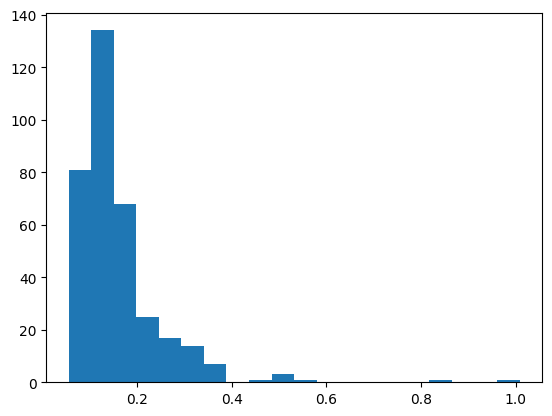

In [ ]:
# filter data
print('shape before filter: ', df.shape)
df = m.filter_data(df, dropnans=True, dropgenes=None, droplowcvs=0.1)
print('shape after filter: ', df.shape)

In [ ]:
# build gmm with 3 distributions (this may take several minutes with lots of data)
gmm = m.my_gmm(df, metadata, 2)

sample:  GSM3932693 , cluster:  [0] Ground Control
sample:  GSM3932694 , cluster:  [0] Ground Control
sample:  GSM3932695 , cluster:  [0] Ground Control
sample:  GSM3932696 , cluster:  [0] Ground Control
sample:  GSM3932697 , cluster:  [0] Ground Control
sample:  GSM3932698 , cluster:  [0] Ground Control
sample:  GSM3932699 , cluster:  [0] Ground Control
sample:  GSM3932700 , cluster:  [0] Ground Control
sample:  GSM3932701 , cluster:  [1] Space Flight
sample:  GSM3932702 , cluster:  [1] Space Flight
sample:  GSM3932703 , cluster:  [1] Space Flight
sample:  GSM3932704 , cluster:  [1] Space Flight
sample:  GSM3932705 , cluster:  [1] Space Flight
sample:  GSM3932706 , cluster:  [1] Space Flight
sample:  GSM3932707 , cluster:  [1] Space Flight
sample:  GSM3932708 , cluster:  [1] Space Flight


**QUESTIONS**

1. How many genes were dropped from the dataframe after dropping 0.1 or lower CVs?  What do you think the effect will be on the quality of the clustering after dropping so many genes from the data set?

2. Does the GMM algorithm require that you specify the number of clusters up-front, or does the algorithm find the ideal number for you?

3. Do the GMM cluster results resemble those of k-means?  Why or why not?

**Double click here to enter your answers to the questions above.**

1. There were 76 genes with low CVs were dropped from the dataframe. Given that the genes excluded from the dataset have lower CVs, I would not see any effect on thr quality of the clustering.

2. The GMM algorithm requires the number of clusters up-front.

3. Yes it does as it was able to accurately categorize ground control and space flight samples, similar to the outcome of k-means technique.

# Plot the RNA-seq gene expression data in a heatmap

In [ ]:
# filter genes to those significantly differentially expressed between ground control and space flight
df = m.filter_by_dgea(data['255-normalized'], metadata['255'],  pval=0.05, l2fc=0)

Fitting size factors...
... done in 0.02 seconds.

Fitting dispersions...
... done in 34.22 seconds.

Fitting dispersion trend curve...
... done in 1.52 seconds.

Fitting MAP dispersions...
... done in 38.27 seconds.

Fitting LFCs...
... done in 18.76 seconds.

Calculating cook's distance...
... done in 0.03 seconds.

Replacing 294 outlier genes.

Fitting dispersions...
... done in 0.35 seconds.

Fitting MAP dispersions...
... done in 0.38 seconds.

Fitting LFCs...
... done in 0.26 seconds.

Running Wald tests...
... done in 5.57 seconds.



Log2 fold change & Wald test p-value: condition 0 vs 1
                      baseMean  log2FoldChange     lfcSE      stat    pvalue  \
ENSMUSG00000000001  247.799812       -0.018393  0.073619 -0.249837  0.802713   
ENSMUSG00000000028   27.844661       -0.175417  0.251489 -0.697513  0.485482   
ENSMUSG00000000031    4.111510        1.098824  0.720941  1.524152  0.127471   
ENSMUSG00000000037   17.569248       -0.267676  0.292810 -0.914163  0.360631   
ENSMUSG00000000049    1.058677        2.166938  1.289496  1.680453  0.092869   
...                        ...             ...       ...       ...       ...   
ENSMUSG00002076937    3.364061       -1.001464  0.889246 -1.126194  0.260083   
ENSMUSG00002076945    1.308321        0.414447  1.081399  0.383250  0.701534   
ENSMUSG00002076971    0.684746        0.261245  1.815131  0.143926  0.885559   
ENSMUSG00002076982    0.685585       -0.263624  1.350536 -0.195200  0.845237   
ENSMUSG00002076983    0.810512       -1.684478  1.616810 -1.04185

In [ ]:
# run DESeq2 to get the dds object for plotting the heatmap
dds = m.run_deseq2(df, metadata['255'])

Fitting size factors...
... done in 0.00 seconds.

Fitting dispersions...
... done in 0.74 seconds.

Fitting dispersion trend curve...
... done in 0.05 seconds.

Fitting MAP dispersions...
... done in 0.92 seconds.

Fitting LFCs...
... done in 0.39 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 1 outlier genes.

Fitting dispersions...
... done in 0.01 seconds.

Fitting MAP dispersions...
... done in 0.01 seconds.

Fitting LFCs...
... done in 0.01 seconds.



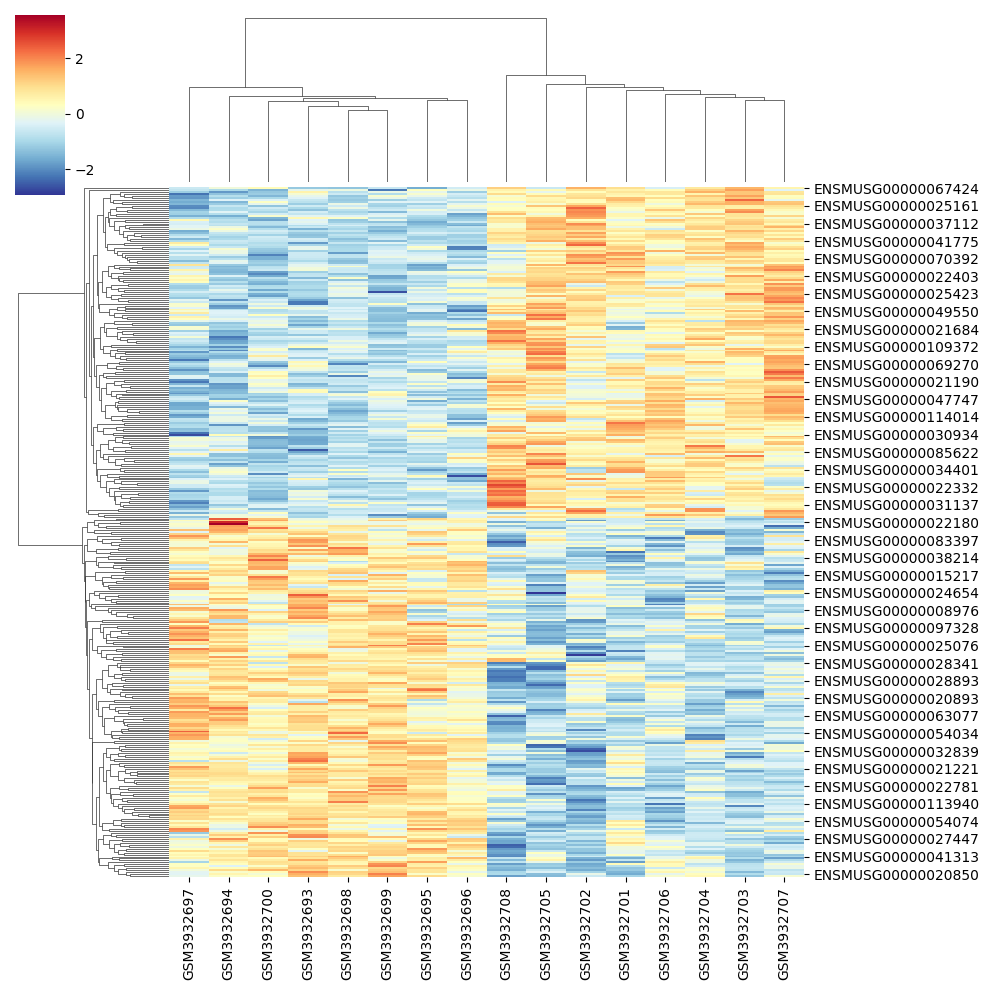

In [ ]:
# calculate log of count data
dds.layers['log1p'] = m.np.log1p(dds.layers['normed_counts'])

# map samples to conditions
 # transpose df
dfT = df.T
dfT.columns=dfT.iloc[0]
dfT=dfT.iloc[1:]
dfT.columns.name=None
dfT = dfT.reset_index().rename(columns={"index":"sample"})
conditions = m.map_samples_to_conditions(dfT, metadata['255'], 'Factor Value[Spaceflight]', 'Ground Control', 'Space Flight')

# create grapher object for plotting heatmap
grapher = m.pd.DataFrame(dds.layers['log1p'].T, index=dds.var_names, columns=list(conditions['sample']))
grapher.head()

# plot the heatmap
m.sns.clustermap(grapher, z_score=0, cmap='RdYlBu_r')

**QUESTIONS**

1.  Which sample is most similar to sample GSM3932698?  How did you choose it?

2.  Which gene and sample seem to have the hottest expression?  The coldest?

3.  Does the heatmap agree with the PCA plot and k-means clusters?

**Double click here to enter your answers to the questions above.**

**QUESTIONS**
1. GSM3932703 seems most similar to sample GSM3932698 based on patterns of the clustermap.

2. Sample GSM3932694 and gene ENSMUSG00000022180 seem to have the hottest expression. Sample GSM3932705 and gene ENSMUSG00000024654 seem to have the coldest expression.

3. I think it does in terms of separation of samples in two clusters.  